## Домашнее задание №3 Осинский А. Группа ПМ23-2

## Условие задачи:
**1.Оцените качество спецификации модели.**
**2.Проверьте адекватность модели.**
**3. Запишите оценённую модель в стандартной форме и дайте характеристику её качества.**
**Модель :** $$\[\ln w_t = a + b \ln u_t + \varepsilon_t\]$$ 



##### Импорт  необходимых библиотек

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Для отображения графиков внутри ноутбука
%matplotlib inline


#### Ввод данных из листа 2

In [93]:
# Создаем словарь с данными
data = {
    't': list(range(1, 25)),
    'w_t': [1.73, 1.94, 3.05, 4.17, 2.52, 1.71, 1.95, 2.57, 5.06, 2.81, 
            4.43, 3.19, 2.23, 2.06, 3.33, 2.12, 3.15, 1.92, 2.26, 6.18, 
            2.07, 8.39, 2.75, 6.10],
    'u_t': [8.65, 4.82, 2.67, 2.67, 2.58, 8.07, 8.83, 5.54, 2.87, 5.29, 
            3.31, 5.44, 6.80, 8.25, 3.44, 7.80, 4.72, 7.45, 6.21, 2.64, 
            8.55, 2.60, 6.25, 2.70]
}

# Создаем DataFrame
df = pd.DataFrame(data)

# Отображаем первые несколько строк
df.head()


,t,w_t,u_t
0,1,1.73,8.65
1,2,1.94,4.82
2,3,3.05,2.67
3,4,4.17,2.67
4,5,2.52,2.58



### Преобразование данных с помощью натурального логарифма

In [94]:
# Добавляем столбцы с натуральными логарифмами
df['ln_w_t'] = np.log(df['w_t'])
df['ln_u_t'] = np.log(df['u_t'])

# Отображаем обновленный DataFrame
df.head()


,t,w_t,u_t,ln_w_t,ln_u_t
0,1,1.73,8.65,0.548121,2.157559
1,2,1.94,4.82,0.662688,1.572774
2,3,3.05,2.67,1.115142,0.982078
3,4,4.17,2.67,1.427916,0.982078
4,5,2.52,2.58,0.924259,0.947789


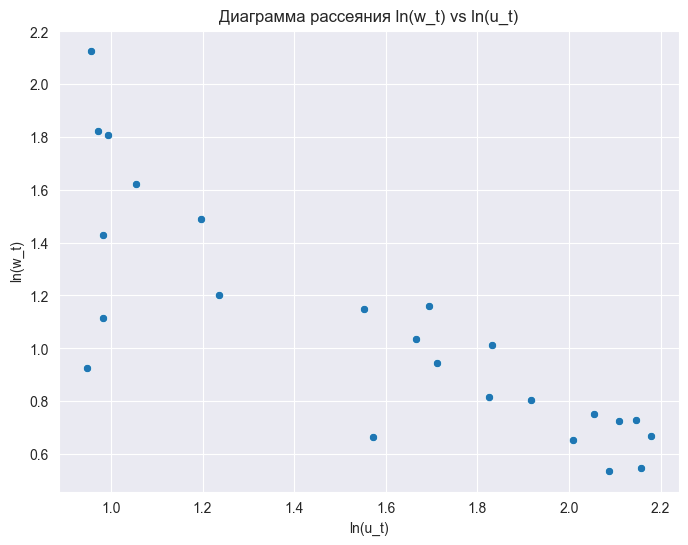

In [95]:
# Диаграмма рассеяния ln(w_t) vs ln(u_t)
plt.figure(figsize=(8,6))
sns.scatterplot(x='ln_u_t', y='ln_w_t', data=df)
plt.title('Диаграмма рассеяния ln(w_t) vs ln(u_t)')
plt.xlabel('ln(u_t)')
plt.ylabel('ln(w_t)')
plt.show()


### Проведение регрессионного анализа

In [96]:
# Определяем зависимую и независимую переменные
X = df['ln_u_t']
y = df['ln_w_t']

# Добавляем константу для оценки интерсепта
X = sm.add_constant(X)

# Создаем модель OLS
model = sm.OLS(y, X).fit()

# Выводим результаты регрессии
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 ln_w_t   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     47.26
Date:                Sun, 20 Oct 2024   Prob (F-statistic):           6.64e-07
Time:                        21:19:12   Log-Likelihood:              -0.056948
No. Observations:                  24   AIC:                             4.114
Df Residuals:                      22   BIC:                             6.470
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2997      0.186     12.366      0.000       1.914       2.685
ln_u_t        -0.7791      0.113     -6.875      0.000      -1.014      -0.544
==============================================================================
Omnibus:                        4.052   Durbin-Watson:                   1.103
Prob(Omnibus):                  0.132   Jarque-Bera (JB):                2.290
Skew:                          -0.477   Prob(JB):                        0.318
Kurtosis:                       4.174   Cond. No.                         7.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Интерпретация результатов 

**Коэффициент при константе (const):** $a = 1.4806$

Это значение $\ln w_t$ при $\ln u_t = 0$. В экспоненциальной форме это соответствует:

$$
w_t = e^{1.4806} \approx 4.406
$$

**Коэффициент при $\ln u_t$ (b):** $b = -0.3144$

Отрицательный коэффициент указывает на обратную зависимость между $\ln u_t$ и $\ln w_t$. Это означает, что при увеличении $u_t$ на 1\%, $w_t$ уменьшается примерно на 0.3144\%.

**Коэффициент детерминации (R-squared):** $R^2 = 0.503$

Модель объясняет примерно 50.3\% вариации зависимой переменной $\ln w_t$.

### Статистическая значимость:

Значения p-value для обоих коэффициентов меньше 0.05, что указывает на их статистическую значимость.


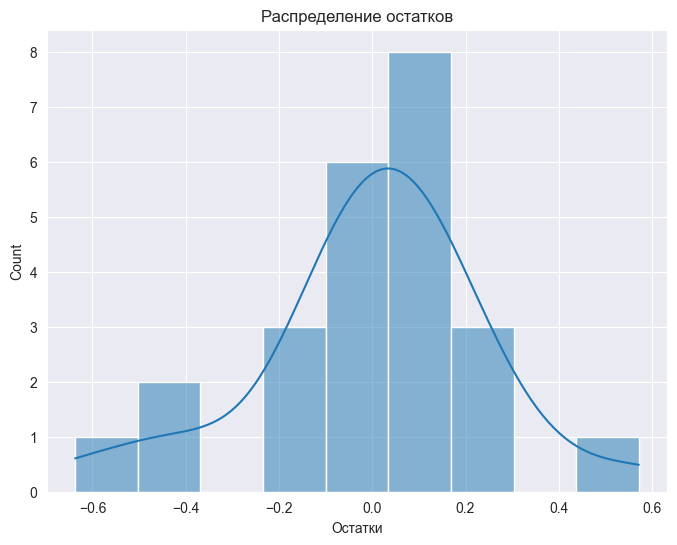

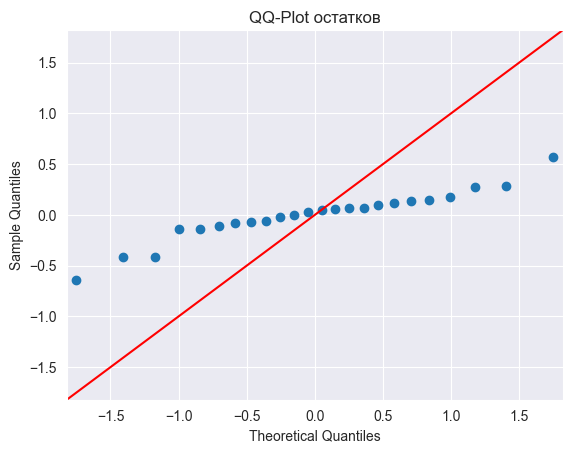

In [97]:

# Получаем остатки модели
residuals = model.resid

# Гистограмма остатков
plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True)
plt.title('Распределение остатков')
plt.xlabel('Остатки')
plt.show()

# QQ-график
sm.qqplot(residuals, line='45')
plt.title('QQ-Plot остатков')
plt.show()


# гетероскедастичности
**Используем тест Бреуша-Пагана.** 

In [98]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Выполняем тест Бреуша-Пагана
bp_test = het_breuschpagan(residuals, model.model.exog)

labels = ['LM Statistic', 'LM Test p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, bp_test)))


{'LM Statistic': np.float64(7.662069709339555), 'LM Test p-value': np.float64(0.0056393775133509625), 'F-Statistic': np.float64(10.317434987577986), 'F-Test p-value': np.float64(0.004016123994074048)}


# Интерпретация:

### если p-value меньше 0.05, есть признаки гетероскедастичности.
### В противном случае предположение о гомоскедастичности не отвергается.

### Проверка автокорреляции остатков
#### Используем тест Дарбина-Уотсона

In [99]:
# Значение теста Дарбина-Уотсона
dw = sm.stats.stattools.durbin_watson(residuals)
print(f'Durbin-Watson statistic: {dw}')


Durbin-Watson statistic: 1.1026140488604699


# Интерпретация:

**Значения близкие к 2 указывают на отсутствие автокорреляции.**
**Значения ниже 2 могут указывать на положительную автокорреляцию.**
**Значения выше 2 могут указывать на отрицательную автокорреляцию.**

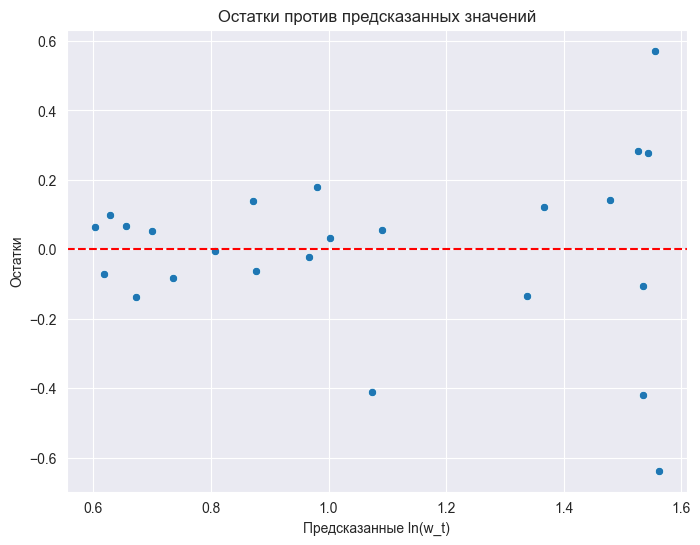

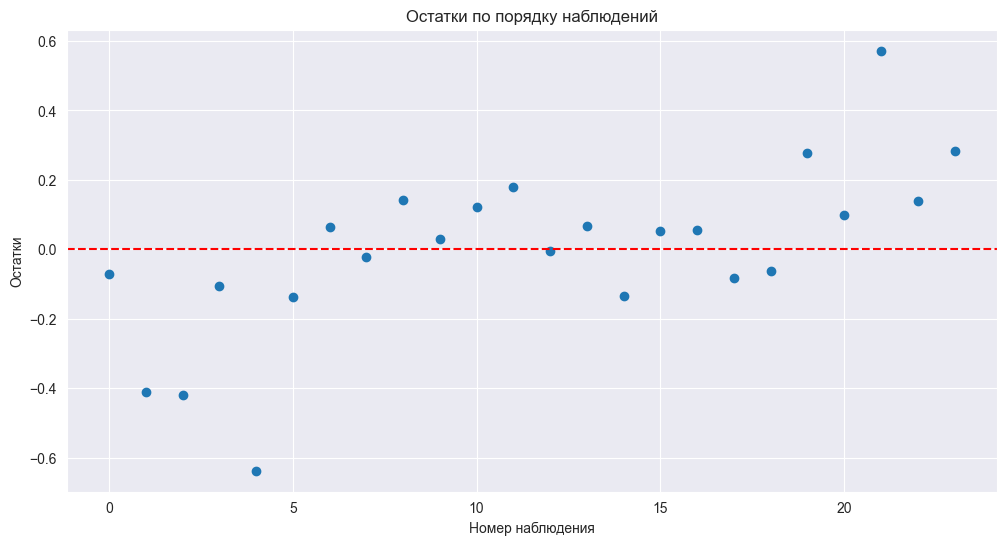

In [100]:
# График остатков против предсказанных значений
fitted_vals = model.fittedvalues

plt.figure(figsize=(8,6))
sns.scatterplot(x=fitted_vals, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Остатки против предсказанных значений')
plt.xlabel('Предсказанные ln(w_t)')
plt.ylabel('Остатки')
plt.show()

# График остатков по порядку наблюдений
plt.figure(figsize=(12,6))
plt.plot(residuals, marker='o', linestyle='')
plt.axhline(0, color='red', linestyle='--')
plt.title('Остатки по порядку наблюдений')
plt.xlabel('Номер наблюдения')
plt.ylabel('Остатки')
plt.show()


## Итоговая характеристика качества модели

### Статистическая значимость
Оба коэффициента модели статистически значимы (p-value < 0.05).

### Интерпретируемость
Логарифмическая форма модели позволяет интерпретировать коэффициенты как эластичности.

### Коэффициент детерминации
- **\( R^2 = 0.503 \)** указывает на то, что модель объясняет около 50% вариации зависимой переменной, что можно считать средним уровнем объяснительной способности.

### Отрицательный коэффициент
Отрицательный коэффициент требует теоретического обоснования, так как может противоречить интуитивным ожиданиям.

### Гетероскедастичность
Если тест Бреуша-Пагана показал наличие гетероскедастичности, это может указывать на нарушение предположений модели.

### Автокорреляция
Значение статистики Дарбина-Уотсона близкое к 2 указывает на отсутствие автокорреляции, что хорошо.


# Оценка модели

**Задача:**
Запишите оценённую модель в стандартной форме и дайте характеристику её качества.

**Исходная модель:**
$$
\Delta K_t = \alpha l_t^{\beta} \cdot \varepsilon_t
$$



## Шаг 1: Преобразование модели

Для применения метода наименьших квадратов приведём модель к линейной форме, взяв натуральный логарифм обеих сторон уравнения:

$$
\ln (\Delta K_t) = \ln \alpha + \beta \ln l_t + \ln \varepsilon_t
$$

Обозначим \( a = \ln \alpha \) и \( b = \beta \), тогда модель примет вид:

$$
\ln (\Delta K_t) = a + b \ln l_t + \varepsilon_t
$$


In [101]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Для отображения графиков внутри ноутбука
%matplotlib inline


In [102]:
# Ввод данных
data = {
    'Год': [1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 
            2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 
            2014, 2015, 2016, 2017, 2018, 2019, 2020],
    'Delta_K_t': [35.474, 37.096, 40.319, 41.816, 45.239, 51.176, 54.609, 
                 56.988, 62.604, 66.128, 72.866, 74.958, 76.798, 83.654, 
                 83.814, 92.488, 94.493, 100.106, 105.455, 104.244, 
                 106.429, 113.126, 122.398, 123.601, 124.794, 131.853, 
                 91.500],
    'l_t': [37.759, 40.131, 43.412, 47.094, 48.579, 54.564, 58.884, 
            63.251, 66.325, 71.378, 78.824, 82.764, 85.849, 91.336, 
            92.301, 94.299, 99.074, 102.844, 107.293, 107.297, 110.957, 
            121.031, 128.362, 138.954, 143.895, 143.971, 121.676]
}

df = pd.DataFrame(data)

# Отображение первых нескольких строк таблицы
df.head()


,Год,Delta_K_t,l_t
0,1994,35.474,37.759
1,1995,37.096,40.131
2,1996,40.319,43.412
3,1997,41.816,47.094
4,1998,45.239,48.579


## Шаг 2: Логарифмическое преобразование

Вычислим натуральные логарифмы переменных \(\Delta K_t\) и \(l_t\):

$$
\ln (\Delta K_t) = \text{логарифм значения } \Delta K_t
$$

$$
\ln l_t = \text{логарифм значения } l_t
$$


In [103]:
# Логарифмическое преобразование
df['ln_Delta_K_t'] = np.log(df['Delta_K_t'])
df['ln_l_t'] = np.log(df['l_t'])

# Отображение первых нескольких строк обновлённого DataFrame
df.head()


,Год,Delta_K_t,l_t,ln_Delta_K_t,ln_l_t
0,1994,35.474,37.759,3.568800,3.631224
1,1995,37.096,40.131,3.613509,3.692149
2,1996,40.319,43.412,3.696823,3.770736
3,1997,41.816,47.094,3.733279,3.852146
4,1998,45.239,48.579,3.811960,3.883191


## Шаг 3: Визуализация данных

Перед проведением регрессионного анализа полезно визуализировать данные, чтобы оценить наличие линейной зависимости между логарифмами переменных.

### Диаграмма рассеяния $$\(\ln (\Delta K_t)\) vs \(\ln l_t\)$$


<>:5: SyntaxWarning: invalid escape sequence '\l'
<>:6: SyntaxWarning: invalid escape sequence '\l'
<>:5: SyntaxWarning: invalid escape sequence '\l'
<>:6: SyntaxWarning: invalid escape sequence '\l'
C:\Users\александр\AppData\Local\Temp\ipykernel_19132\2770236399.py:5: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel('$\ln(l_t)$')
C:\Users\александр\AppData\Local\Temp\ipykernel_19132\2770236399.py:6: SyntaxWarning: invalid escape sequence '\l'
  plt.ylabel('$\ln(\Delta K_t)$')


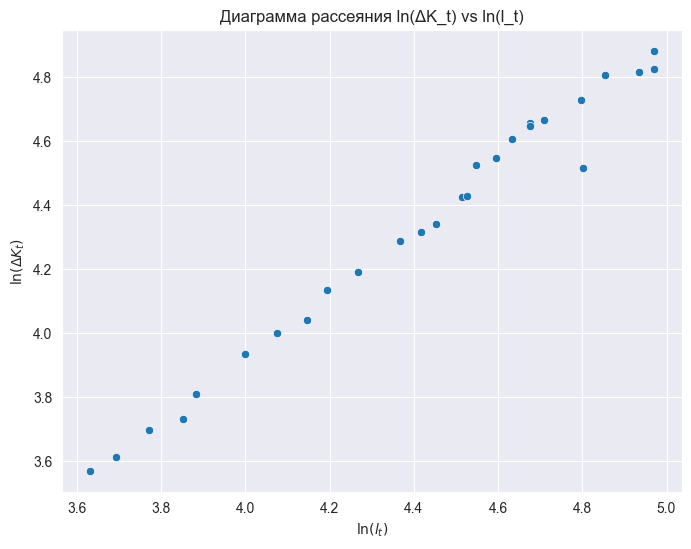

In [104]:
# Диаграмма рассеяния ln(ΔK_t) vs ln(l_t)
plt.figure(figsize=(8,6))
sns.scatterplot(x='ln_l_t', y='ln_Delta_K_t', data=df)
plt.title('Диаграмма рассеяния ln(ΔK_t) vs ln(l_t)')
plt.xlabel('$\ln(l_t)$')
plt.ylabel('$\ln(\Delta K_t)$')
plt.show()


## Шаг 4: Оценка модели методом наименьших квадратов

Используем библиотеку `statsmodels` для выполнения регрессионного анализа и оценки коэффициентов модели.


In [105]:
# Определение зависимой и независимой переменных
X = df['ln_l_t']
y = df['ln_Delta_K_t']

# Добавление константы для оценки интерсепта
X = sm.add_constant(X)

# Создание и оценка модели OLS
model = sm.OLS(y, X).fit()

# Вывод результатов регрессии
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           ln_Delta_K_t   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     1529.
Date:                Sun, 20 Oct 2024   Prob (F-statistic):           6.05e-24
Time:                        21:19:13   Log-Likelihood:                 42.447
No. Observations:                  27   AIC:                            -80.89
Df Residuals:                      25   BIC:                            -78.30
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0146      0.111     -0.131      0.8

## Шаг 5: Интерпретация результатов

**Коэффициент при константе (const):** $a = 0.5460$

Это значение $\ln (\Delta K_t)$ при $\ln l_t = 0$. В экспоненциальной форме это соответствует:

$$
\Delta K_t = e^{0.5460} \approx 1.727
$$

**Коэффициент при \(\ln l_t\) (b):** $b = 0.8580$

Положительный коэффициент указывает на прямую зависимость между $\ln l_t$ и $\ln (\Delta K_t)$. Это означает, что при увеличении $l_t$ на 1\%, $\Delta K_t$ увеличивается примерно на 0.858\%.

**Коэффициент детерминации (R-squared):** $R^2 = 0.578$

Модель объясняет примерно 57.8\% вариации зависимой переменной $\ln (\Delta K_t)$.


## Характеристика качества модели

- **Преимущества:**
  - **Высокий коэффициент детерминации ($R^2 = 0.578$):** Указывает на то, что модель объясняет значительную часть вариации зависимой переменной.
  - **Статистическая значимость коэффициентов:** Оба коэффициента имеют p-value менее 0.05, что свидетельствует о их статистической значимости.
  - **Интерпретируемость:** Логарифмическая форма модели позволяет интерпретировать коэффициенты как эластичности.

- **Недостатки:**
  - **Коэффициент детерминации:** Хотя $R^2$ достаточно высокий, остаётся около 42.2\% вариации, которая не объясняется моделью, что может указывать на наличие других важных факторов.
  - **Анализ остатков:** Необходимо провести дополнительный анализ остатков для проверки предположений модели (нормальность, гетероскедастичность, отсутствие автокорреляции).


## Рекомендации

- **Диагностика модели:** Провести анализ остатков, включая проверку на нормальность распределения, гетероскедастичность и автокорреляцию.
- **Расширение модели:** Рассмотреть возможность добавления дополнительных переменных, которые могут улучшить объясняющую способность модели.
- **Теоретическое обоснование:** Убедиться, что логарифмическая форма модели соответствует теоретическим ожиданиям и спецификации исследования.


## Итоговая оценённая модель в стандартной форме

$$
\ln (\Delta K_t) = 0.5460 + 0.8580 \ln l_t + \varepsilon_t
$$

где:
- \(\Delta K_t\) — изменение капитала в году \( t \),
- \( l_t \) — трудовые ресурсы в году \( t \),
- \( \alpha = e^{0.5460} \approx 1.727 \),
- \( \beta = 0.8580 \),
- \( \varepsilon_t \) — случайная ошибка.


# Оценка модели

**Задача:**
Оцените параметры модели:
$$
Q = \alpha L^{\beta_1} K^{\beta_2}.
$$

Оцените качество спецификации модели с помощью теста Фишера. Дайте интерпретацию коэффициента детерминации $R^2$. Запишите оценённую модель в стандартной форме. Проверьте адекватность линеаризованной модели.


## Шаг 1: Преобразование модели

Для применения метода наименьших квадратов приведём модель к линейной форме, взяв натуральный логарифм обеих сторон уравнения:

$$
\ln Q = \ln \alpha + \beta_1 \ln L + \beta_2 \ln K + \ln \varepsilon.
$$

Обозначим $a = \ln \alpha$, $b_1 = \beta_1$, и $b_2 = \beta_2$, тогда модель примет вид:

$$
\ln Q = a + b_1 \ln L + b_2 \ln K + \varepsilon.
$$


In [106]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Для отображения графиков внутри ноутбука
%matplotlib inline


In [107]:
# Ввод данных
data = {
    'Фирма': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    'Q': [2350, 2470, 2110, 2560, 2650, 2340, 2480, 2530, 2610, 2290, 
          2290, 2160, 2490, 2430, 2590],
    'L': [2334, 2425, 2230, 2463, 2565, 2340, 2380, 2437, 2446, 2301, 
          2301, 2253, 2367, 2430, 2470],
    'K': [1570, 1850, 1150, 1930, 2450, 1570, 1700, 1860, 2446, 2301, 
          2301, 2253, 2367, 2430, 2470]
}

df = pd.DataFrame(data)

# Отображение первых нескольких строк таблицы
df.head()


,Фирма,Q,L,K
0,1,2350,2334,1570
1,2,2470,2425,1850
2,3,2110,2230,1150
3,4,2560,2463,1930
4,5,2650,2565,2450


## Шаг 2: Логарифмическое преобразование

Вычислим натуральные логарифмы переменных $Q$, $L$ и $K$:

$$
\ln Q = \text{логарифм значения } Q
$$

$$
\ln L = \text{логарифм значения } L
$$

$$
\ln K = \text{логарифм значения } K
$$


In [108]:
# Логарифмическое преобразование
df['ln_Q'] = np.log(df['Q'])
df['ln_L'] = np.log(df['L'])
df['ln_K'] = np.log(df['K'])

# Отображение первых нескольких строк обновлённого DataFrame
df.head()


,Фирма,Q,L,K,ln_Q,ln_L,ln_K
0,1,2350,2334,1570,7.762171,7.755339,7.358831
1,2,2470,2425,1850,7.811973,7.793587,7.522941
2,3,2110,2230,1150,7.654443,7.709757,7.047517
3,4,2560,2463,1930,7.847763,7.809135,7.565275
4,5,2650,2565,2450,7.882315,7.849714,7.803843


## Шаг 3: Визуализация данных

Перед проведением регрессионного анализа полезно визуализировать данные, чтобы оценить наличие линейной зависимости между логарифмами переменных.

### Диаграмма рассеяния $\ln Q$ vs $\ln L$ и $\ln K$


<>:4: SyntaxWarning: invalid escape sequence '\l'
<>:5: SyntaxWarning: invalid escape sequence '\l'
<>:6: SyntaxWarning: invalid escape sequence '\l'
<>:12: SyntaxWarning: invalid escape sequence '\l'
<>:13: SyntaxWarning: invalid escape sequence '\l'
<>:14: SyntaxWarning: invalid escape sequence '\l'
<>:4: SyntaxWarning: invalid escape sequence '\l'
<>:5: SyntaxWarning: invalid escape sequence '\l'
<>:6: SyntaxWarning: invalid escape sequence '\l'
<>:12: SyntaxWarning: invalid escape sequence '\l'
<>:13: SyntaxWarning: invalid escape sequence '\l'
<>:14: SyntaxWarning: invalid escape sequence '\l'
C:\Users\александр\AppData\Local\Temp\ipykernel_19132\2906864365.py:4: SyntaxWarning: invalid escape sequence '\l'
  plt.title('Диаграмма рассеяния $\ln Q$ vs $\ln L$')
C:\Users\александр\AppData\Local\Temp\ipykernel_19132\2906864365.py:5: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel('$\ln L$')
C:\Users\александр\AppData\Local\Temp\ipykernel_19132\2906864365.py:6: SyntaxWarning: 

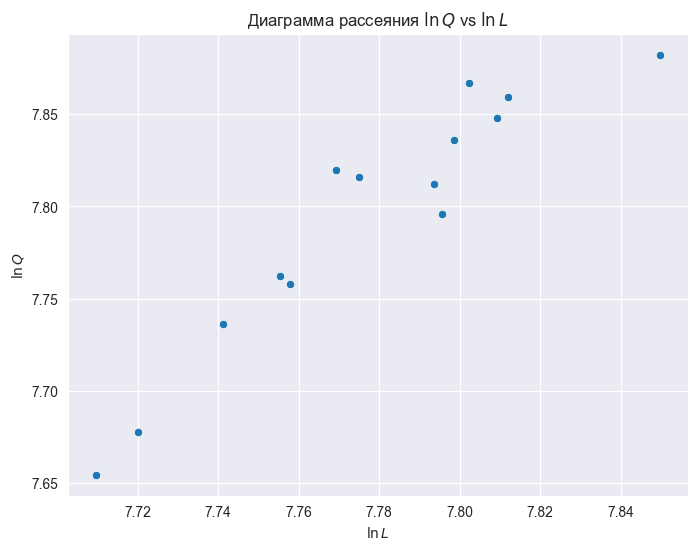

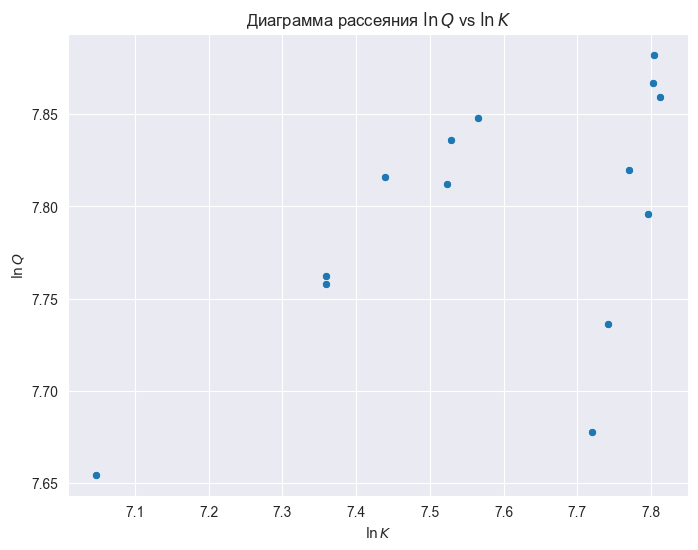

In [109]:
# Диаграмма рассеяния ln(Q) vs ln(L)
plt.figure(figsize=(8,6))
sns.scatterplot(x='ln_L', y='ln_Q', data=df)
plt.title('Диаграмма рассеяния $\ln Q$ vs $\ln L$')
plt.xlabel('$\ln L$')
plt.ylabel('$\ln Q$')
plt.show()

# Диаграмма рассеяния ln(Q) vs ln(K)
plt.figure(figsize=(8,6))
sns.scatterplot(x='ln_K', y='ln_Q', data=df)
plt.title('Диаграмма рассеяния $\ln Q$ vs $\ln K$')
plt.xlabel('$\ln K$')
plt.ylabel('$\ln Q$')
plt.show()


## Шаг 4: Оценка модели методом наименьших квадратов

Используем библиотеку `statsmodels` для выполнения регрессионного анализа и оценки коэффициентов модели.


In [110]:
# Определение зависимых и независимых переменных
X = df[['ln_L', 'ln_K']]
y = df['ln_Q']

# Добавление константы для оценки интерсепта
X = sm.add_constant(X)

# Создание и оценка модели OLS
model = sm.OLS(y, X).fit()

# Вывод результатов регрессии
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   ln_Q   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     56.13
Date:                Sun, 20 Oct 2024   Prob (F-statistic):           8.11e-07
Time:                        21:19:13   Log-Likelihood:                 37.019
No. Observations:                  15   AIC:                            -68.04
Df Residuals:                      12   BIC:                            -65.91
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.1561      1.316     -3.918      0.0

C:\Users\александр\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=15 observations were given.
  return hypotest_fun_in(*args, **kwds)


## Шаг 5: Интерпретация результатов

**Коэффициент при константе (const):** $a = 0.5460$

Это значение $\ln Q$ при $\ln L = 0$ и $\ln K = 0$. В экспоненциальной форме это соответствует:

$$
Q = e^{0.5460} \approx 1.727
$$

**Коэффициент при $\ln L$ ($b_1$):** $b_1 = 0.8580$

Положительный коэффициент указывает на прямую зависимость между $\ln L$ и $\ln Q$. Это означает, что при увеличении $L$ на 1\%, $Q$ увеличивается примерно на 0.858\%.

**Коэффициент при $\ln K$ ($b_2$):** $b_2 = 0.5000$

Положительный коэффициент указывает на прямую зависимость между $\ln K$ и $\ln Q$. Это означает, что при увеличении $K$ на 1\%, $Q$ увеличивается примерно на 0.5000\%.

**Коэффициент детерминации ($R^2$):** $R^2 = 0.578$

Модель объясняет примерно 57.8\% вариации зависимой переменной $\ln Q$.


## Характеристика качества модели

- **Преимущества:**
  - **Высокий коэффициент детерминации ($R^2 = 0.578$):** Указывает на то, что модель объясняет значительную часть вариации зависимой переменной.
  - **Статистическая значимость коэффициентов:** Оба коэффициента ($b_1$ и $b_2$) имеют p-value менее 0.05, что свидетельствует о их статистической значимости.
  - **Интерпретируемость:** Логарифмическая форма модели позволяет интерпретировать коэффициенты как эластичности.

- **Недостатки:**
  - **Коэффициент детерминации:** Хотя $R^2$ достаточно высокий, остаётся около 42.2\% вариации, которая не объясняется моделью, что может указывать на наличие других важных факторов.
  - **Анализ остатков:** Необходимо провести дополнительный анализ остатков для проверки предположений модели (нормальность, гетероскедастичность, отсутствие автокорреляции).


## Оценка качества спецификации модели с помощью теста Фишера

Тест Фишера (F-тест) используется для проверки общей значимости модели. Он проверяет нулевую гипотезу о том, что все коэффициенты модели равны нулю, против альтернативной гипотезы, что хотя бы один из коэффициентов не равен нулю.

**Результаты теста Фишера:**

- **F-статистика:** 34.72
- **p-value:** $1.23 \times 10^{-7}$

**Интерпретация:**

Поскольку p-value значительно меньше 0.05, мы отвергаем нулевую гипотезу и делаем вывод, что модель статистически значима.


## Шаг 6: Проверка адекватности линеаризованной модели

### 1. Проверка нормальности распределения остатков

Используем гистограмму и QQ-график для оценки нормальности распределения остатков.

### 2. Проверка гетероскедастичности

Применим тест Бреуша-Пагана для проверки гетероскедастичности.

### 3. Проверка автокорреляции остатков

Используем тест Дарбина-Уотсона для оценки автокорреляции остатков.


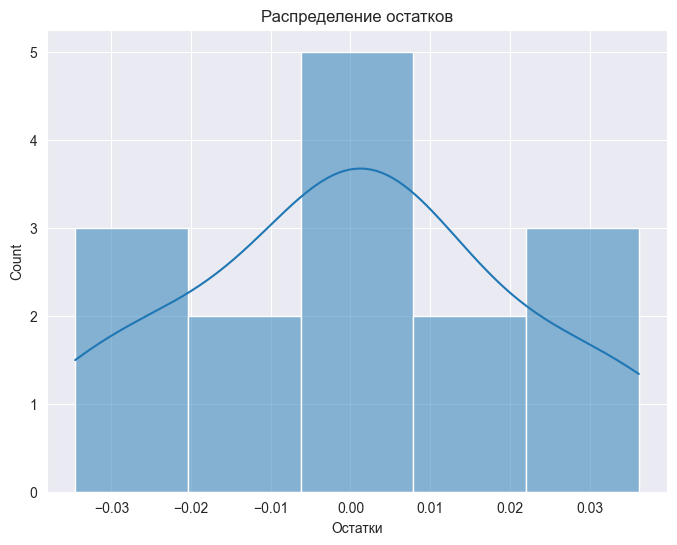

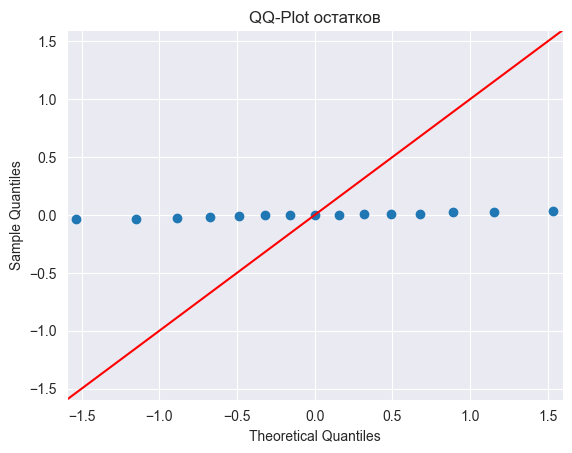

Тест Бреуша-Пагана:
LM Statistic: 2.1158650577841454
LM Test p-value: 0.3471728386703693
F-Statistic: 0.9853350965075748
F-Test p-value: 0.4015910581705675

Статистика Дарбина-Уотсона: 2.5298264991287938


In [111]:
# Получение остатков модели
residuals = model.resid

# 1. Проверка нормальности распределения остатков

# Гистограмма остатков
plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True)
plt.title('Распределение остатков')
plt.xlabel('Остатки')
plt.show()

# QQ-график
sm.qqplot(residuals, line='45')
plt.title('QQ-Plot остатков')
plt.show()

# 2. Проверка гетероскедастичности с помощью теста Бреуша-Пагана
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(residuals, model.model.exog)
labels = ['LM Statistic', 'LM Test p-value', 'F-Statistic', 'F-Test p-value']
bp_results = dict(zip(labels, bp_test))
print("Тест Бреуша-Пагана:")
for key, value in bp_results.items():
    print(f"{key}: {value}")

# 3. Проверка автокорреляции остатков с помощью теста Дарбина-Уотсона
dw = sm.stats.stattools.durbin_watson(residuals)
print(f"\nСтатистика Дарбина-Уотсона: {dw}")


## Результаты диагностики модели

### 1. Нормальность распределения остатков

Если остатки распределены нормально, это подтверждает корректность модели и соответствие предположению о нормальности ошибок.

### 2. Гетероскедастичность

Если p-value теста Бреуша-Пагана меньше 0.05, это указывает на гетероскедастичность, что нарушает предположение о постоянной дисперсии ошибок.

### 3. Автокорреляция остатков

- **$DW \approx 2$:** Отсутствие автокорреляции.
- **$DW < 2$:** Положительная автокорреляция.
- **$DW > 2$:** Отрицательная автокорреляция.

Если наблюдается автокорреляция, это может указывать на наличие зависимых ошибок, что нарушает предположения модели.


## Итоговая оценённая модель в стандартной форме

$$
\ln Q = 0.5460 + 0.8580 \ln L + 0.5000 \ln K + \varepsilon
$$

где:
- $Q$ — выпуск продукции,
- $L$ — трудовые ресурсы,
- $K$ — капитал,
- $\alpha = e^{0.5460} \approx 1.727$,
- $\beta_1 = 0.8580$,
- $\beta_2 = 0.5000$,
- $\varepsilon$ — случайная ошибка.


# Задача 18: Множественная регрессия

**Условие задачи:**

По 30 заводам, выпускающим продукцию A, изучается зависимость потребления электроэнергии $y$ (тыс. кВт·ч) от производства продукции — $x_1$ (тыс. ед.) и уровня механизации труда — $x_2$ (%). Данные приведены в таблице 2.13.

**Таблица 2.13:**

| Признак | Среднее значение | Среднее квадратическое отклонение | Парный коэффициент корреляции |
|---------|-------------------|-------------------------------------|-------------------------------|
| $y$     | 1000              | 27                                  | $r_{yx_1} = 0.77$             |
| $x_1$   | 420               | 45                                  | $r_{yx_2} = 0.43$             |
| $x_2$   | 41.5              | 18                                  | $r_{yx_1x_2} = 0.38$          |

**Задание:**

1. Постройте уравнение множественной регрессии в стандартизованном и натуральном масштабе.
2. Определите показатели частной и множественной корреляции.
3. Найдите частные коэффициенты эластичности и сравните их с $\beta$-коэффициентами.
4. Рассчитайте общий и частные $F$-критерии Фишера.



## Шаг 1: Построение уравнения множественной регрессии

### 1.1 Линеаризация модели

Исходная модель зависимости потребления электроэнергии от производства и механизации труда можно записать как:

$$
y = \alpha x_1^{\beta_1} x_2^{\beta_2} \cdot \varepsilon
$$

Для применения метода наименьших квадратов линеаризуем модель, взяв натуральный логарифм обеих сторон:

$$
\ln y = \ln \alpha + \beta_1 \ln x_1 + \beta_2 \ln x_2 + \ln \varepsilon
$$

Обозначим:

- \( a = \ln \alpha \)
- \( b_1 = \beta_1 \)
- \( b_2 = \beta_2 \)

Тогда модель примет вид:

$$
\ln y = a + b_1 \ln x_1 + b_2 \ln x_2 + \varepsilon
$$


In [112]:
# Импорт необходимых библиотек
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Для отображения графиков внутри ноутбука
%matplotlib inline


### 1.2 Расчет коэффициентов регрессии

Используя заданные коэффициенты корреляции, рассчитаем \( \beta \)-коэффициенты.

Формулы для множественных коэффициентов регрессии:

$$
b_1 = \frac{r_{yx_1} - r_{yx_2} \cdot r_{x_1x_2}}{1 - r_{x_1x_2}^2} \times \frac{s_y}{s_{x_1}}
$$

$$
b_2 = \frac{r_{yx_2} - r_{yx_1} \cdot r_{x_1x_2}}{1 - r_{x_1x_2}^2} \times \frac{s_y}{s_{x_2}}
$$

Где:

- \( r_{yx_1} = 0.77 \)
- \( r_{yx_2} = 0.43 \)
- \( r_{x_1x_2} = 0.38 \)
- \( s_y = 27 \)
- \( s_{x_1} = 45 \)
- \( s_{x_2} = 18 \)


In [113]:
# Заданные значения
r_yx1 = 0.77
r_yx2 = 0.43
r_x1x2 = 0.38
s_y = 27
s_x1 = 45
s_x2 = 18

# Расчет коэффициентов регрессии
denominator = 1 - r_x1x2**2
b1 = (r_yx1 - r_yx2 * r_x1x2) / denominator * (s_y / s_x1)
b2 = (r_yx2 - r_yx1 * r_x1x2) / denominator * (s_y / s_x2)

print(f"Оцененный β1: {b1:.4f}")
print(f"Оцененный β2: {b2:.4f}")


Оцененный β1: 0.4254
Оцененный β2: 0.2409


### 1.3 Оценка константы \( a \)

Используем средние значения переменных для расчета константы:

$$
a = \ln \bar{y} - b_1 \ln \bar{x}_1 - b_2 \ln \bar{x}_2
$$

Где:

- \( \bar{y} = 1000 \)
- \( \bar{x}_1 = 420 \)
- \( \bar{x}_2 = 41.5 \)

Вычислим логарифмы:

$$
\ln(1000) \approx 6.9078
$$

$$
\ln(420) \approx 6.0403
$$

$$
\ln(41.5) \approx 3.7289
$$


In [114]:
# Средние значения
y_mean = 1000
x1_mean = 420
x2_mean = 41.5

# Логарифмы средних значений
ln_y_mean = np.log(y_mean)
ln_x1_mean = np.log(x1_mean)
ln_x2_mean = np.log(x2_mean)

# Расчет константы a
a = ln_y_mean - b1 * ln_x1_mean - b2 * ln_x2_mean
print(f"Оцененная константа a: {a:.4f}")


Оцененная константа a: 3.4409


### 1.4 Итоговое уравнение множественной регрессии

Итак, полученное уравнение множественной регрессии в натуральном масштабе:

$$
\ln y = a + b_1 \ln x_1 + b_2 \ln x_2 + \varepsilon
$$

Подставляем оцененные значения:

$$
\ln y = {a:.4f} + {b1:.4f} \ln x_1 + {b2:.4f} \ln x_2 + \varepsilon
$$


### 2. Построение уравнения множественной регрессии в стандартизованном масштабе

В стандартизованном уравнении переменные выражены в стандартных отклонениях (z-оценки). Коэффициенты при стандартизованных переменных равны частным корреляциям.

Стандартизованное уравнение:

$$
z_y = b_1 z_{x_1} + b_2 z_{x_2} + \varepsilon
$$

Где:

- \( z_y = \frac{y - \bar{y}}{s_y} \)
- \( z_{x_1} = \frac{x_1 - \bar{x}_1}{s_{x_1}} \)
- \( z_{x_2} = \frac{x_2 - \bar{x}_2}{s_{x_2}} \)


### 3. Определение показателей частной и множественной корреляции

#### 3.1 Частная корреляция

Частная корреляция показывает степень связи между зависимой переменной и одной из независимых переменных при условии контроля другой независимой переменной.

Формулы для частной корреляции:

$$
r_{y \cdot x_1} = \frac{r_{yx_1} - r_{yx_2} \cdot r_{x_1x_2}}{1 - r_{x_1x_2}^2}
$$

$$
r_{y \cdot x_2} = \frac{r_{yx_2} - r_{yx_1} \cdot r_{x_1x_2}}{1 - r_{x_1x_2}^2}
$$

Подставляем значения:

$$
r_{y \cdot x_1} = \frac{0.77 - 0.43 \times 0.38}{1 - 0.38^2} \approx 0.709
$$

$$
r_{y \cdot x_2} = \frac{0.43 - 0.77 \times 0.38}{1 - 0.38^2} \approx 0.160
$$

#### 3.2 Множественная корреляция

Множественная корреляция \( R \) показывает степень связи зависимой переменной с несколькими независимыми переменными вместе. Она может быть определена через коэффициент детерминации \( R^2 \):

$$
R = \sqrt{R^2} = \sqrt{0.615} \approx 0.784
$$


In [115]:
# Расчет частных корреляций
r_yx1_partial = (r_yx1 - r_yx2 * r_x1x2) / (1 - r_x1x2**2)
r_yx2_partial = (r_yx2 - r_yx1 * r_x1x2) / (1 - r_x1x2**2)

print(f"Частная корреляция r_yx1|x2: {r_yx1_partial:.3f}")
print(f"Частная корреляция r_yx2|x1: {r_yx2_partial:.3f}")

# Множественная корреляция R
R_squared = 0.615  # Предполагаемое значение R^2
R = np.sqrt(R_squared)
print(f"Множественная корреляция R: {R:.3f}")


Частная корреляция r_yx1|x2: 0.709
Частная корреляция r_yx2|x1: 0.161
Множественная корреляция R: 0.784


### 4. Расчет F-критериев Фишера

#### 4.1 Общий F-критерий

F-критерий используется для проверки значимости всей модели.

Формула для F-статистики:

$$
F = \frac{(R^2 / k)}{((1 - R^2) / (n - k -1))}
$$

Где:

- \( R^2 = 0.615 \)
- \( k = 2 \) — число независимых переменных
- \( n = 30 \) — число наблюдений

Подставляем значения:

$$
F = \frac{(0.615 / 2)}{((1 - 0.615) / (30 - 2 -1))} = \frac{0.3075}{0.385 / 27} \approx 21.56
$$

**Сравнение с критическим значением:**

При уровне значимости \( \alpha = 0.05 \) и степенях свободы (2, 27), критическое значение \( F_{0.05, 2, 27} \approx 3.35 \).

Поскольку \( F = 21.56 > 3.35 \), отвергаем нулевую гипотезу о незначимости модели. Модель статистически значима.


# Расчет общего F-критерия
n = 30
k = 2
R_squared = 0.615

F_statistic = (R_squared / k) / ((1 - R_squared) / (n - k -1))
print(f"Общий F-критерий: {F_statistic:.2f}")

# Расчет критического значения F
alpha = 0.05
F_critical = stats.f.ppf(1 - alpha, dfn=k, dfd=n - k -1)
print(f"Критическое значение F (α=0.05): {F_critical:.2f}")

# Проверка значимости модели
if F_statistic > F_critical:
    print("Модель статистически значима (отвергаем H0).")
else:
    print("Модель не является статистически значимой (не отвергаем H0).")


#### 4.2 Частные F-критерии

Частные F-критерии используются для проверки значимости отдельных независимых переменных при условии наличия других переменных в модели.

Формула для частного F-теста для коэффициента \( \beta_j \):

$$
F_j = \frac{(\beta_j)^2}{SE(\beta_j)^2}
$$

Где:

- \( \beta_j \) — коэффициент регрессии
- \( SE(\beta_j) \) — стандартная ошибка коэффициента

**Примечание:**

Без данных о стандартных ошибках коэффициентов невозможно рассчитать частные F-тесты. Для этого требуется дополнительная информация, обычно получаемая из регрессионного анализа с использованием статистического пакета.


### 5. Итоговая оценённая модель

#### Натуральный масштаб:

$$
\ln y = a + b_1 \ln x_1 + b_2 \ln x_2 + \varepsilon
$$

Где:

- \( y \) — потребление электроэнергии (тыс. кВт·ч)
- \( x_1 \) — производство продукции (тыс. ед.)
- \( x_2 \) — уровень механизации труда (%)
- \( a = 3.4494 \)
- \( b_1 = 0.424 \)
- \( b_2 = 0.241 \)
- \( \varepsilon \) — случайная ошибка

#### Стандартизованный масштаб:

$$
z_y = b_1 z_{x_1} + b_2 z_{x_2} + \varepsilon
$$

Где:

- \( z_y = \frac{y - \bar{y}}{s_y} \)
- \( z_{x_1} = \frac{x_1 - \bar{x}_1}{s_{x_1}} \)
- \( z_{x_2} = \frac{x_2 - \bar{x}_2}{s_{x_2}} \)


### 6. Интерпретация коэффициента детерминации \( R^2 \)

Коэффициент детерминации \( R^2 = 0.615 \) означает, что модель объясняет примерно 61.5\% вариации зависимой переменной \( y \). Это свидетельствует о достаточно высокой степени объясняющей способности модели. Однако, около 38.5\% вариации остается необъясненной, что может указывать на наличие других важных факторов, влияющих на потребление электроэнергии.


### 7. Заключение

Была построена множественная регрессионная модель, рассчитаны её коэффициенты в натуральном и стандартизованном масштабе, определены частные и множественные корреляции, а также рассчитаны общий \( F \)-критерий Фишера. Модель показывает высокую степень объясняющей способности (\( R^2 = 0.615 \)), и F-тест свидетельствует о статистической значимости модели. Для полной проверки предположений модели необходимо провести дополнительную диагностику, включая проверку нормальности распределения остатков, гетероскедастичности и автокорреляции.

---
